# Clustering

Clustering is the grouping of data points which are similar to each other. It can be a powerful technique for identifying patterns in data. Clustering analysis does not usually require any training and is known as an unsupervised learning technique. The lack of a need for training means it can be applied quickly. Typical applications are:

 * Looking for trends in data
 * Data compression, all data clustering around a point can be reduced to just that point. For example reducing colour depth of an image.
 * Pattern recognition

## K-means Clustering

The K-means clustering algorithm is a simple clustering algorithm that tries to identify the centre of each cluster. It does this by searching for a point which minimises the distance between the centre and all the points in the cluster. The algorithm needs to be told how many clusters to look for, but a common technique is to try different numbers of clusters and combine it with other tests to decide on the best combination. Let's try this using skikit-learn:

In [1]:
# Necessary imports
import time
import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
import sklearn.datasets.samples_generator as skl_smpl

In [5]:
# Generate 4 clusters in a 400-point dataset
data, cluster_id = skl_smpl.make_blobs(n_samples=400, cluster_std=0.75,
                                       centers=4, random_state=1)

In [13]:
# Initialise a Kmean object to do the analysis
Kmean = skl_cluster.KMeans(n_clusters=4)

In [15]:
# Run the kmeans algorithm on the data
Kmean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
# Use the kmeans predictor to work out which class each item is in
clusters = Kmean.predict(data)

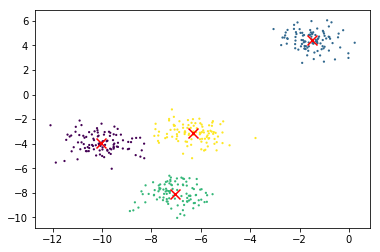

In [18]:
# plot the data, colouring it by cluster
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0,c=clusters)

# plot the centres of each cluster as an X
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

plt.show()

### Advantages of K-Means
 * Simple algorithm, fast to compute. A good choice as the first thing to try when attempting to cluster data.
 * Suitable for large datasets due to its low memory and computing requirements.

### Limitations of K-Means

 * Requires number of clusters to be known in advance
 * Struggles when clusters have irregular shapes
 * Will always produce an answer finding the required number of clusters even if the data isn't clustered (or clustered in that many clusters).
 * Requires linear cluster boundaries

## Exercise: more and overlapping clusters 

Adjust the program above to increase the standard deviation of the blobs (the cluster_std parameter to make_blobs) and increase the number of samples (n_samples) to 4000. You should start to see the clusters overlapping. Do the clusters that are identified make sense? Is there any strange behaviour from this?

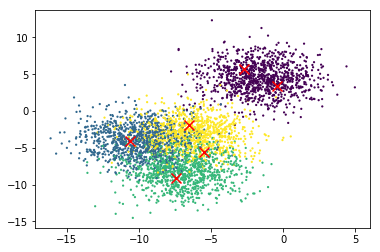

In [22]:
# SOLUTION:
data, cluster_id = skl_smpl.make_blobs(n_samples=4000, cluster_std=2,
                                           centers=4, random_state=1)
Kmean = skl_cluster.KMeans(n_clusters=6)
Kmean.fit(data)
clusters = Kmean.predict(data)
plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0,c=cluster_id)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
plt.show()

### Exercise: How many clusters should we look for?

As K-Means requires us to specify the number of clusters to expect a common strategy to get around this is to vary the number of clusters we are looking for. Modify the program to loop through searching for between 2 and 10 clusters. Which (if any) of the results look more sensible? What criteria might you use to select the best one?

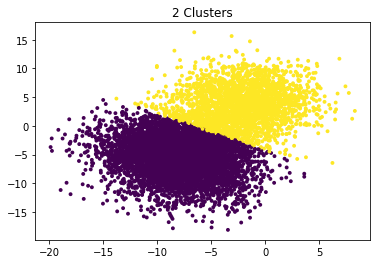

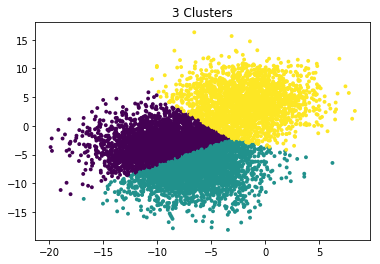

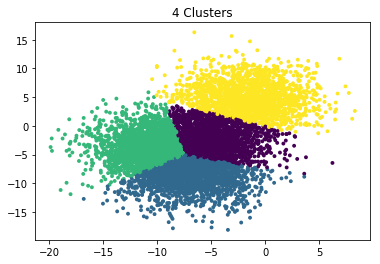

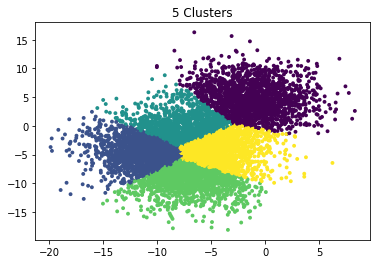

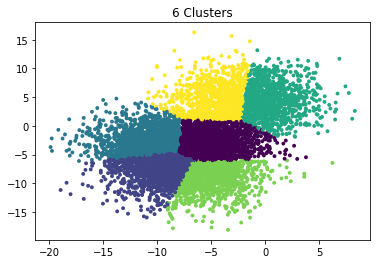

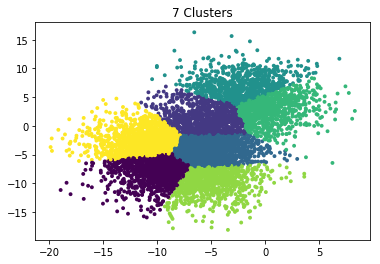

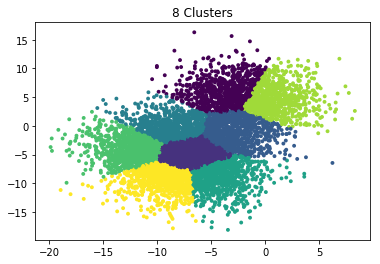

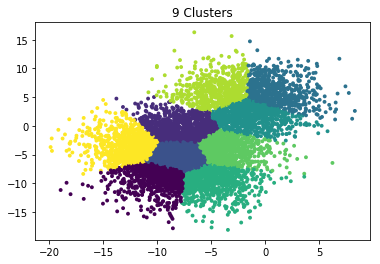

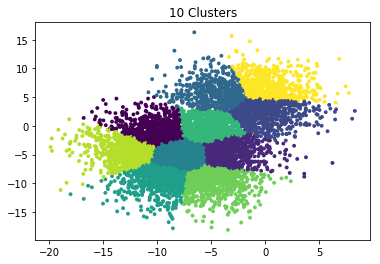

Elapsed time =  9.81586503982544 seconds


In [23]:
# SOLUTION
start_time = time.time()
data, cluster_id = skl_smpl.make_blobs(n_samples=8000, cluster_std=3,
                                       centers=4, random_state=1)
for cluster_count in range(2,11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    clusters = Kmean.predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=clusters)
    
    plt.title(str(cluster_count)+" Clusters")
    plt.show()
end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")

## Spectral Clustering

Spectral clustering is a technique that attempts to overcome the linear boundary problem of k-means clustering. It works by treating clustering as a graph partitioning problem, its looking for nodes in a graph with a small distance between them. See [this](http://www.cvl.isy.liu.se:82/education/graduate/spectral-clustering/SC_course_part1.pdf) introduction to Spectral Clustering if you are interested in more details about how spectral clustering works.

Here is an example of using spectral clustering on two concentric circles:
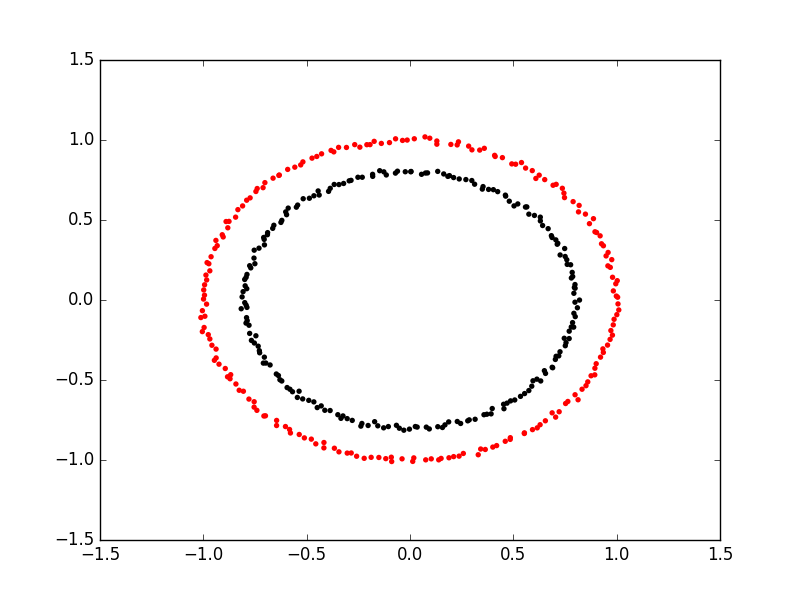


In [24]:
# Necessary imports
import matplotlib.pyplot as plt
import matplotlib
import mpl_toolkits.mplot3d as plt3d
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data
import numpy as np

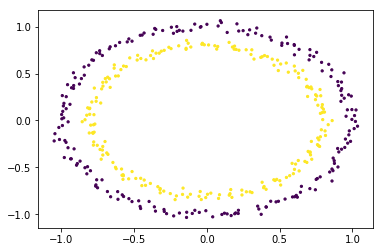

In [42]:
# Create the circles
circles, circles_clusters = \
    skl_data.make_circles(n_samples=400, 
    noise=.03, random_state=0)
plt.scatter(circles[:, 0], circles[:, 1], s=5, c=circles_clusters)

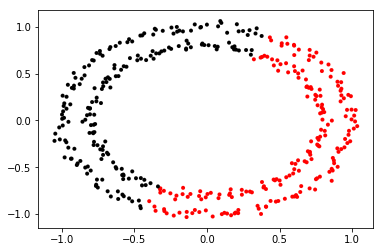

In [43]:
# See how standard kmeans fails
Kmean = skl_cluster.KMeans(n_clusters=2)

# run the kmeans algorithm on the data
Kmean.fit(circles)

# use the kmeans predictor to work out which class each item is in
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters,cmap='flag')
plt.show()

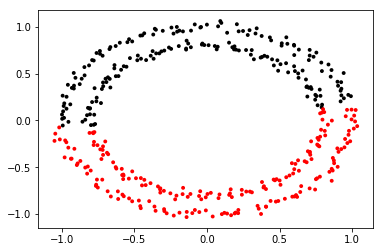

In [44]:
# Now try spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2,
                                           affinity='nearest_neighbors',
                                           assign_labels='kmeans')
labels = model.fit_predict(circles)

# Plot the data in 2D
plt.scatter(circles[:, 0], circles[:, 1], s=15, 
            linewidth=0, c=labels, cmap='flag')

In [45]:
# Define a plotting function to show the clustering in 3D
def plot_3d_separation(circles,labels):

    #create two empty arrays for the points inside a list
    circles2 = [np.zeros([200,3]),np.zeros([200,3])]

    circle_indicies = [0,0]
    for i in range(0,400):
        x = circles[i][0]
        y = circles[i][1]
        label = labels[i]
        j = circle_indicies[label]
        circles2[label][j][0] = x
        circles2[label][j][1] = y
        circles2[label][j][2] = label
        circle_indicies[label] = circle_indicies[label] + 1

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(circles2[0][:, 0],circles2[0][:, 1],circles2[0][:, 2],c=matplotlib.cm.flag(0))
    ax.scatter(circles2[1][:, 0],circles2[1][:, 1],circles2[1][:, 2],c=matplotlib.cm.flag(255))

    plt.show()

# Plot the data in 3D    
plot_3d_separation(circles,labels)

IndexError: index 200 is out of bounds for axis 0 with size 200